In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

In [4]:
data.head()
data.tail()
data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11043,-117.83,33.82,26.0,3259.0,456.0,1354.0,459.0,5.7817,267600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
2835,-118.99,35.40,48.0,1908.0,331.0,789.0,321.0,3.5714,84600.0,INLAND
15522,-117.06,33.14,27.0,3819.0,674.0,2447.0,717.0,3.8185,137200.0,<1H OCEAN
6620,-118.12,34.17,37.0,2705.0,676.0,1551.0,608.0,2.2692,225000.0,INLAND


In [5]:
data.shape

(20640, 10)

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


1)ocean proximity is in object so we need to encode it to feed it algorithm 

2)there are less null values so these can be dropped without affecting the results much

In [8]:
data.dropna(inplace=True)

In [9]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'],axis = 1)

y = data['median_house_value']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [11]:
train_data = x_train.join(y_train)


In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18256,-122.09,37.38,36.0,2587.0,416.0,1055.0,410.0,6.1995,NEAR BAY,407200.0
1413,-122.07,37.94,43.0,1454.0,234.0,683.0,258.0,4.4750,NEAR BAY,265700.0
3063,-119.24,35.68,21.0,1885.0,398.0,1539.0,388.0,2.5208,INLAND,58500.0
3300,-122.62,38.94,14.0,1731.0,400.0,638.0,282.0,2.3179,INLAND,57500.0
12430,-116.26,33.65,3.0,7437.0,1222.0,574.0,302.0,10.2948,INLAND,382400.0
...,...,...,...,...,...,...,...,...,...,...
16463,-121.28,38.11,10.0,2974.0,588.0,1559.0,568.0,3.8825,INLAND,136800.0
79,-122.28,37.80,38.0,684.0,176.0,344.0,155.0,2.0114,NEAR BAY,131300.0
12237,-116.94,33.74,19.0,2901.0,445.0,1414.0,475.0,4.6406,INLAND,118900.0
14282,-117.13,32.72,32.0,2197.0,623.0,1784.0,599.0,1.9010,NEAR OCEAN,120300.0


Doing basic exploration of numeric features and corelating

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

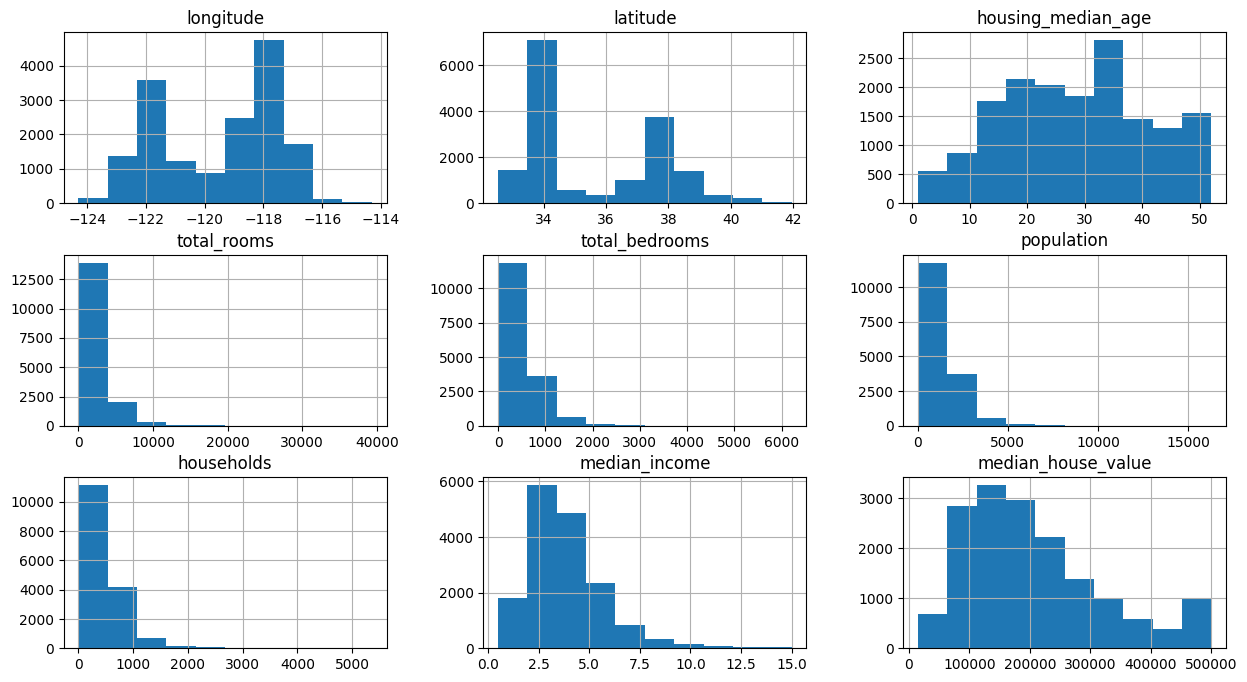

In [13]:
train_data.hist(figsize=(15,8))

In [14]:
dummies = pd.get_dummies(train_data['ocean_proximity'], dtype=int)




In [15]:
train_data = train_data.join(dummies).drop(['ocean_proximity'],axis=1)

<Axes: >

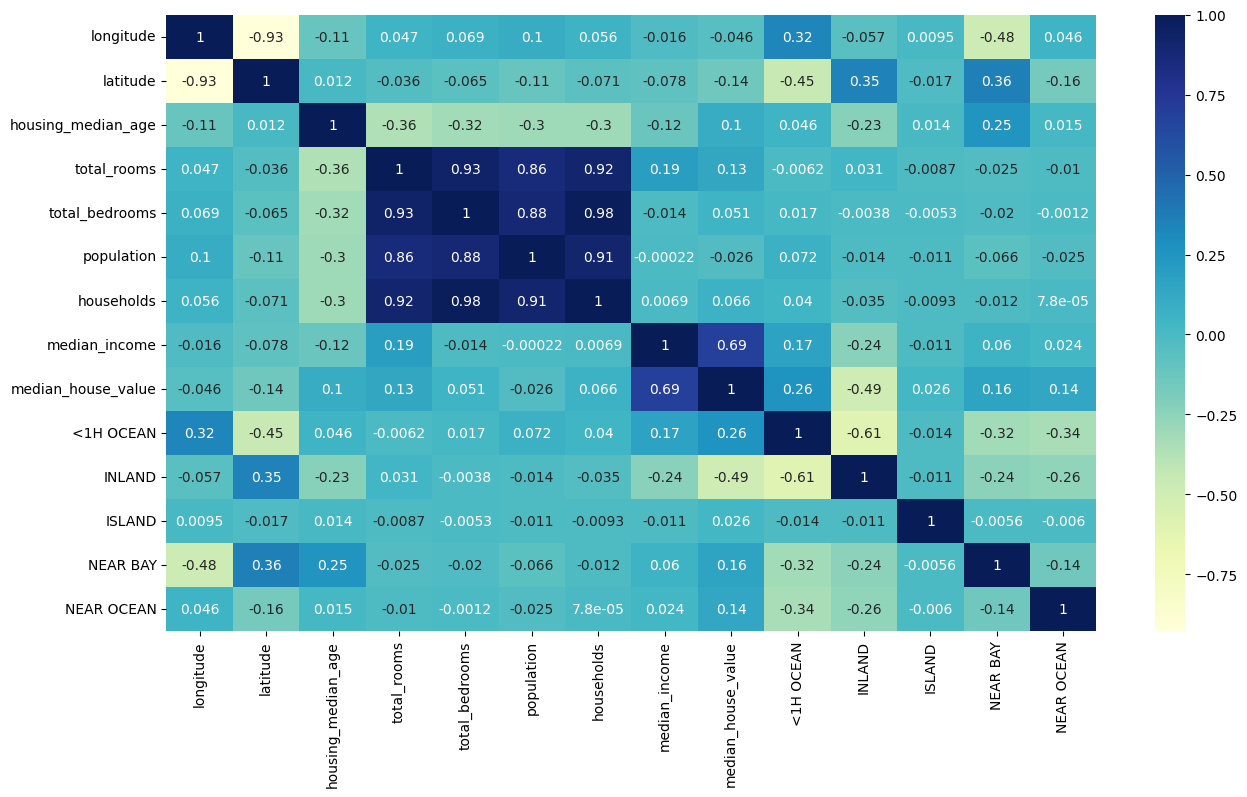

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot=True , cmap="YlGnBu")

In [17]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

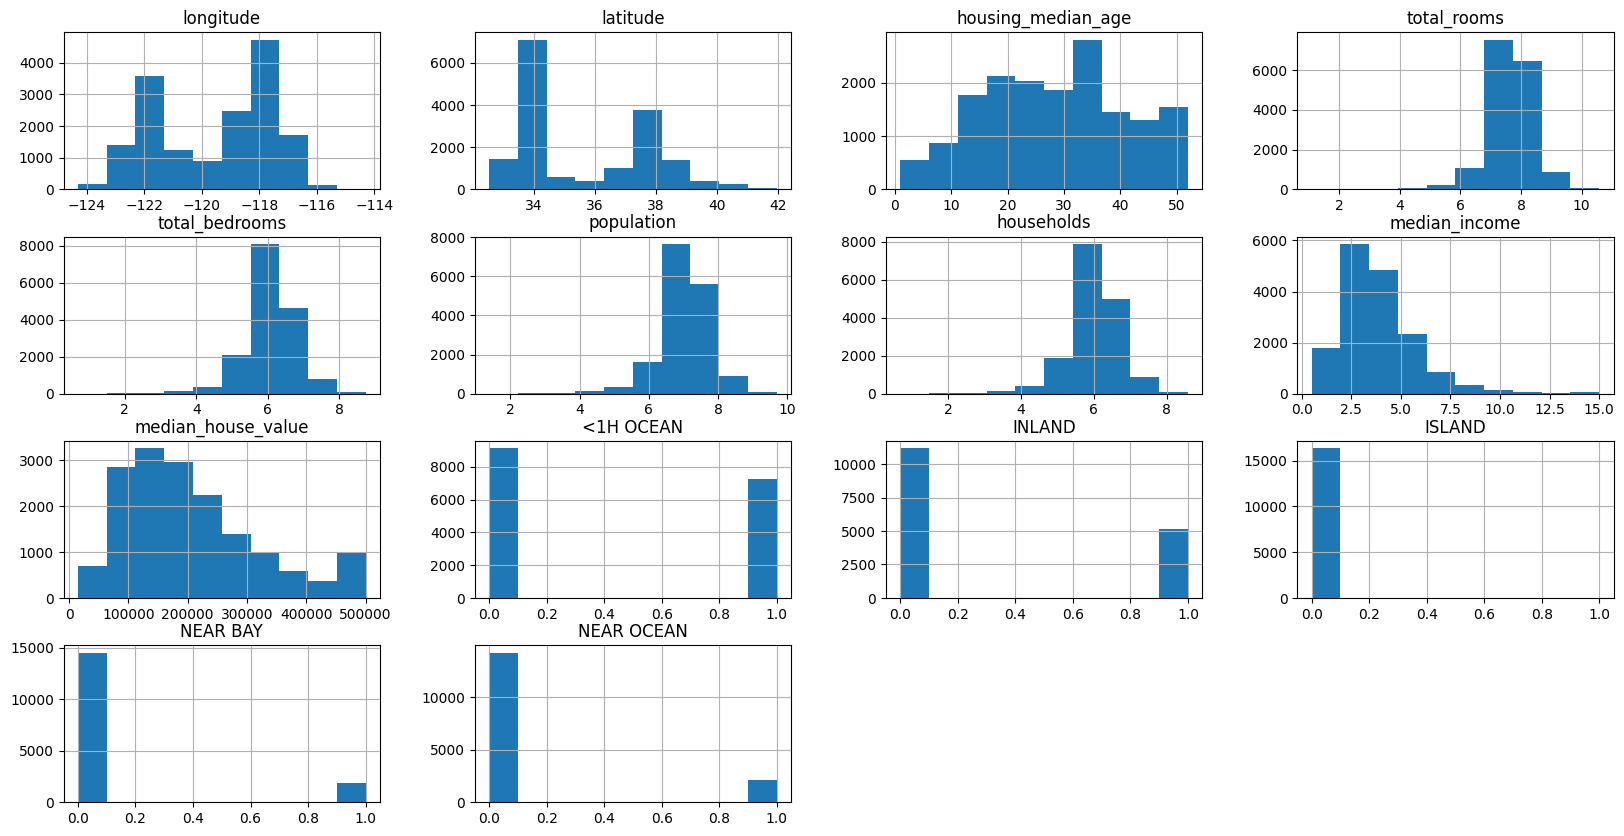

In [18]:
train_data.hist(figsize=(20,10))

<Axes: xlabel='latitude', ylabel='longitude'>

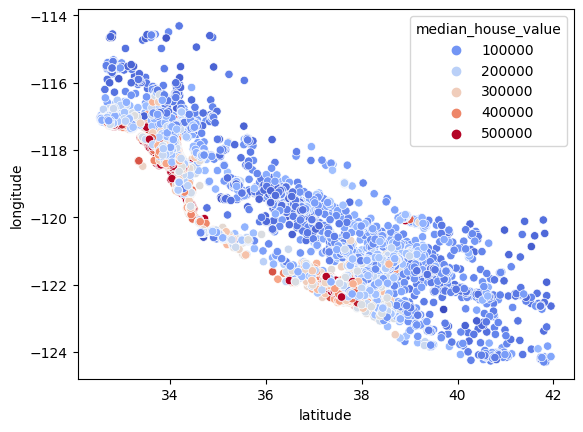

In [19]:
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [20]:
train_data['bedroom_rooms'] = train_data['total_rooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

In [21]:
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train,y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

x_train_s = scaler.fit_transform(x_train)

reg=LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [22]:
test_data=x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

dummies = pd.get_dummies(test_data['ocean_proximity'], dtype=int)


test_data = test_data.join(dummies).drop(['ocean_proximity'],axis=1)

test_data['bedroom_rooms'] = test_data['total_rooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

In [23]:
x_test,y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [24]:
x_test_s = scaler.transform(x_test)
reg.score(x_test_s,y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-487.7380232726031

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
forest = RandomForestRegressor()

In [27]:
forest.fit(x_train,y_train)

RandomForestRegressor()

In [28]:
forest.score(x_test,y_test)

0.8182908613875822

# HyperParameter Tuning 

In [29]:
from sklearn.model_selection import GridSearchCV

# from sklearn.metrics import mean_squared_error

forest=RandomForestRegressor()

param_grid = {
    "n_estimators" : [3,10,30],
    "max_features" : [2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring = "neg_mean_squared_error",
                           return_train_score = True)
grid_search.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [31]:
best_forest = grid_search.best_estimator_

In [32]:
best_forest.score(x_test_s,y_test)

0.8154298004176748